<p style="text-align: center;">
<big><big><big><b>Practical 7 & 8: Neural Networks</b></big></big></big>
</p>

### The task

This practical we will consider predicting monthly (4 week) per household spend (low/med/high) using neural networks.

### Data
We will use data in the table:
`transaction_data_small`


### Data documentation
The full documentation can be found [here](https://drive.google.com/file/d/1Ioozg-V5NJB5wDwoPXDhdZEbClABRZqd/view). Note the full data source [is avaliable onine](https://www.dunnhumby.com/careers/engineering/sourcefiles). However, please use the copy already loaded into your database.

---
#**Part 1: Practical 7**
---

In [ ]:
###############################################################################
#####                     REQUIRED SETUP FOR GOOGLE COLAB               ######
###############################################################################
# if get_ipython().__class__.__module__ == "google.colab._shell":
#  TensorFlow setup
#  !pip -q install tensorflow==2.0.0-alpha0
#  !pip -q install tensorflow-hub
#  !pip -q install category_encoders

In [6]:
import pandas as pd
import numpy as np

In [7]:
#Import data as pandas dataframe
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/transaction_data_small.csv', header = 0)

In [8]:
def get_dataset(rd, tws = 28, ows =28):
    #Select rows with DAY smaller than 7000 and group the data by 'household_key'
    data2 = data[data['DAY'] <= 700].groupby('household_key')
    df = pd.DataFrame(data2.apply(lambda x: x[x['DAY'] > rd][x['DAY'] <= rd+ows]['SALES_VALUE'].sum()).reset_index(name ='output_feature'))
    df1 = pd.DataFrame(data2.apply(lambda x: x[x['DAY'] > rd-tws][x['DAY'] <= rd]['SALES_VALUE'].sum()).reset_index(name ='f1'))
    df2 = pd.DataFrame(data2.apply(lambda x: x[x['DAY'] > rd-tws*2][x['DAY'] <= rd-tws]['SALES_VALUE'].sum()).reset_index(name ='f2'))
    df3 = pd.DataFrame(data2.apply(lambda x: x[x['DAY'] > rd-tws*3][x['DAY'] <= rd-tws*2]['SALES_VALUE'].sum()).reset_index(name ='f3'))
    df4 = pd.DataFrame(data2.apply(lambda x: x[x['DAY'] > rd-tws*4][x['DAY'] <= rd-tws*3]['SALES_VALUE'].sum()).reset_index(name ='f4'))
    df5 = pd.DataFrame(data2.apply(lambda x: x[x['DAY'] > rd-tws*5][x['DAY'] <= rd-tws*4]['SALES_VALUE'].sum()).reset_index(name ='f5'))
    df6 = pd.DataFrame(data2.apply(lambda x: x[x['DAY'] > rd-tws*6][x['DAY'] <= rd-tws*5]['SALES_VALUE'].sum()).reset_index(name ='f6'))
    df7 = pd.DataFrame(data2.apply(lambda x: x[x['DAY'] > rd-tws*7][x['DAY'] <= rd-tws*6]['SALES_VALUE'].sum()).reset_index(name ='f7'))
    df8 = pd.DataFrame(data2.apply(lambda x: x[x['DAY'] > rd-tws*8][x['DAY'] <= rd-tws*7]['SALES_VALUE'].sum()).reset_index(name ='f8'))
    df9 = pd.DataFrame(data2.apply(lambda x: x[x['DAY'] > rd-tws*9][x['DAY'] <= rd-tws*8]['SALES_VALUE'].sum()).reset_index(name ='f9'))
    df10 = pd.DataFrame(data2.apply(lambda x: x[x['DAY'] > rd-tws*10][x['DAY'] <= rd-tws*9]['SALES_VALUE'].sum()).reset_index(name ='f10'))
    dfs = [df, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
    dfs = [df.set_index('household_key') for df in dfs]
    df_join = dfs[0].join(dfs[1:])
    return df_join.drop(columns = ['output_feature'], inplace = False), df_join.output_feature

# Your Turn: Data loading and preparation

## Task 1: Load a single hold-out test set, including a validation set.

Recall there are 711 days in the data. However, we need all periods to be fully covered (there is very little data in the last 28 day period since only 11 days are within the data range). Therefore our effective data size is 700 days.

The function, given a reference date in days, returns 10 tumbling window features, where each feature is an aggregate (SUM) over 28 days.
The output feature is the aggregate over the 28 days immediatly proceeding the reference date. It only uses the first 700 days. 

If you still unsure how to do this ask and/or read this [story about Bob and Jane](https://docs.google.com/document/d/1wIZARovA8NXOJ2OBjAW7Lw5QjtovDHlLbdxl6VAMW0M/edit?usp=sharing).

### Task 1a: Given the above information, select the reference date for the test set and create the variables X_test y_test

### Task 1b: Given the above information, select the reference date for the validation set and create the variables X_valid y_valid

### Task 1c: Select the the reference date for the training set and create the variables X_train, y_train


In [38]:
# Task 1a
# Test reference date should be 28 days (length output feature is aggregated over)
# from the end date (700), therefore: 700-28 = 672
# Note: we should also quickly check if we have enough data for the function to return
#       10 historic months, i.e. 28*10 < 672 (which it is)
X_test, y_test  = get_dataset(672)

# Task 1b
# Validation reference date should be 28 days (length output feature is aggregated over)
# from the test reference date (672), therefore: 672-28 = 644
# Note: we should also quickly check if we have enough data for the function to return
#       10 historic months, i.e. 28*10 < 644 (which it is)
X_valid, y_valid  = get_dataset(644)

# Task 1c
# Train reference date should be 28 days (length output feature is aggregated over)
# from the test reference date (672), therefore: 644-28 = 616
# Note: we should also quickly check if we have enough data for the function to return
#       10 historic months, i.e. 28*10 < 616 (which it is)
X_train, y_train  = get_dataset(616)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: U

## Task 2: Convert the output feature in the train, validation and test sets to be low/mid/high
Use the following rules:
low <= 30<br>
30 < mid <= 100<br>
high > 100



In [42]:
'''y_test[y_test <= 30] = 0
y_test[ (y_test > 30) & (y_test <= 100) ] = 1
y_test[y_test > 100] = 2

y_train[y_train <= 30] = 0
y_train[ (y_train > 30) & (y_train <= 100) ] = 1
y_train[y_train > 100] = 2

y_valid[y_valid <= 30] = 0
y_valid[ (y_valid > 30) & (y_valid <= 100) ] = 1
y_valid[y_valid > 100] = 2'''

#or 
# Please only run this code once
y_test = y_test.apply(lambda x:0 if x<=30 else (2 if x >100 else 1))
y_train = y_train.apply(lambda x:0 if x<=30 else (2 if x >100 else 1))
y_valid = y_valid.apply(lambda x:0 if x<=30 else (2 if x >100 else 1))


In [43]:
print(y_test.value_counts())
print(y_train.value_counts())
print(y_valid.value_counts())

2    228
0    165
1    107
Name: output_feature, dtype: int64
2    227
0    150
1    123
Name: output_feature, dtype: int64
2    211
0    167
1    122
Name: output_feature, dtype: int64


# Part 1
## Task 3: Train a deep neural net (fully connected layers). Your choices:
* Number of layers
* Number of nodes per layer
* Batch size
* Number of iterations

In all cases (for now) please:
* use an **relu** activation function for all but the last layer
* use a **softmax** activation function for the last layer
* provide the labels as integers (rather than one hot encoding) 
* compile your model via:
```
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["sparse_categorical_accuracy"])
```

**What's the best accuracy you can get on the validation set (at least 60% should be possible)?**

Remember you can make a summary of your model and see a graphical representation via:
```
model.summary()
keras.utils.plot_model(model, "my_model.png", show_shapes=True)
```



In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
# if import plot_model unsuccessfully, please try the next code
#from keras.utils.vis_utils import plot_model

In [45]:
#this code is to randomness fix the randomness in the process
#so we can get reproducible results (not 100%, but to reduce the variance in the rsults)
#but it is totally up to whether to set this up
from numpy.random import seed
np.random.seed(1)

from tensorflow import random
random.set_seed(2)

import random as rn
rn.seed(1234)


In [46]:
#set model 
model = Sequential([
    Dense(5, input_shape = [10], activation="relu"),
    Dense(8, activation="relu"),
    Dense(3, activation="softmax") #using softmax for last layer because the target is multiclass classification
])

In [47]:
model.summary()

# The model summary shows:
# - The layers and their order in the model.
# - The output shape of each layer.
# - The number of parameters (weights) in each layer.
# - The total number of parameters (weights) in the model.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 8)                 48        
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


## install pydot and graphviz
before you run the code below, you may need to install two extra packages: <b>"pydot"</b> and <b>"graphviz"</b>
### step 0:
using the code: `pip install pydot` to install pydot
### step 1:
<b>if you use Mac</b>

step1.1

you can run `brew install graphviz` to install graphviz(need homebrew to run brew command).
if your system haven't installed homebrew yet, it will raise an error. You need to install homebrew first. Refer [here](https://brew.sh) for homebrew installation.

<b>if you use Windows</b>, 

step1.1

download the graphviz package [here](https://graphviz.org/download/#windows) and install it on your computer in some directory. 

step1.2

Then you need to set the environment path. To do so, you can run the code below under the python environment:

`import os`

`os.environ['PATH'] = os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin' (you need replace the directory in this code to where your have installed the graphviz)`

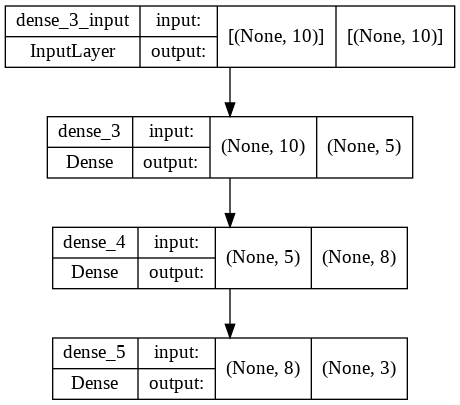

In [48]:
#create model picture

plot_model(model, "my_model.png", show_shapes=True, show_layer_names=True)

In [49]:
#compile model
model.compile(loss="sparse_categorical_crossentropy",
            optimizer="sgd" , #stochastic gradient descent
            metrics=["sparse_categorical_accuracy"])

In [50]:
#fit model
history = model.fit(X_train, y_train,  epochs=400,
         validation_data=(X_valid, y_valid),
batch_size = 50
)

Epoch 1/400
10/10 [==============================] - 1s 21ms/step - loss: 19.6535 - sparse_categorical_accuracy: 0.4040 - val_loss: 1.2281 - val_sparse_categorical_accuracy: 0.4300
Epoch 2/400
10/10 [==============================] - 0s 7ms/step - loss: 1.1437 - sparse_categorical_accuracy: 0.4680 - val_loss: 1.1492 - val_sparse_categorical_accuracy: 0.4320
Epoch 3/400
10/10 [==============================] - 0s 7ms/step - loss: 1.1017 - sparse_categorical_accuracy: 0.4660 - val_loss: 1.1280 - val_sparse_categorical_accuracy: 0.4340
Epoch 4/400
10/10 [==============================] - 0s 7ms/step - loss: 1.0848 - sparse_categorical_accuracy: 0.4660 - val_loss: 1.1201 - val_sparse_categorical_accuracy: 0.4340
Epoch 5/400
10/10 [==============================] - 0s 7ms/step - loss: 1.0802 - sparse_categorical_accuracy: 0.4680 - val_loss: 1.1173 - val_sparse_categorical_accuracy: 0.4340
Epoch 6/400
10/10 [==============================] - 0s 7ms/step - loss: 1.0776 - sparse_categorical_ac

(0.0, 2.0)

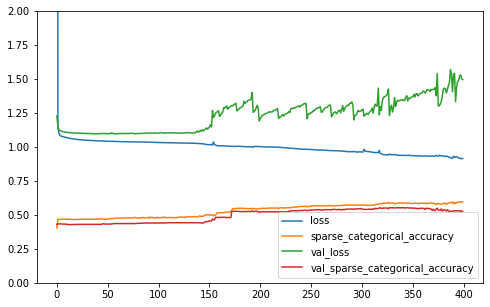

In [51]:
#Complete the code and plot your model
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 2)

#is your model overfitting or underfitting?
#A model is overfitting when:
#loss on train set decreasing
#loss on valid set stable/increasing

# if there is a overfitting/underfitting problem, you might need to decrease/increase your model complexity

In [52]:
## evaluate the model on the testing dataset
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

4/4 [==============================] - 0s 5ms/step - loss: 1.2693 - sparse_categorical_accuracy: 0.5760
test loss, test acc: [1.2693402767181396, 0.5759999752044678]


---
#**Part 2: Practical 8**
---

## Task 4: Refine your model

Copy your model below.

Now try and improve it by:
* adding/deleting layers or increasing/decreasing neurons in layers
* changing the initialization of the weights in the layers
* changing the activation function
* including batch normalization

**What helped? What didn't? Is it a combination? Does the improvement worth it (considering the score on the validation set)?**

**Note:** If you want to see what weights have been learnt you can call:
```
model.weights
```
after training.

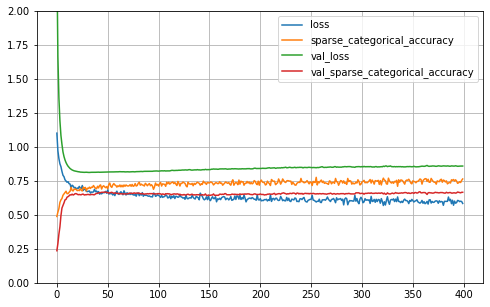

16/16 [==============================] - 0s 2ms/step - loss: 0.8591 - sparse_categorical_accuracy: 0.6660


[0.859097957611084, 0.6660000085830688]

In [53]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization

model2 = keras.models.Sequential([
    BatchNormalization( input_shape = [X_train.shape[1]]),
    keras.layers.Dense(10, activation="elu",kernel_initializer=keras.initializers.he_normal(seed=13111985),use_bias=False),
    BatchNormalization(),
    keras.layers.Dense(8, activation="elu",kernel_initializer=keras.initializers.he_normal(seed=13111985),use_bias=False),
    BatchNormalization(),
    keras.layers.Dense(6, activation="elu",kernel_initializer=keras.initializers.he_normal(seed=13111985),use_bias=False),
    BatchNormalization(),
    keras.layers.Dense(3, activation="softmax")
])

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["sparse_categorical_accuracy"])

history = model2.fit(X_train, y_train, epochs=400,
                    validation_data=(X_valid, y_valid),verbose = 0, batch_size = 50)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_graph")
plt.show()
model2.evaluate(X_valid,y_valid)

## Task 4b: Test the two models (from Tasks 3 & 4) on the test set
What was the difference in performance? **NOTE: this is in general bad practice if we were going to then select and use one of these models.** Why? As we are procedurally overfitting (selecting based on knowledge from the test set). However, for now it serves to show to you while you learn that the model is actually doing better on completely unseen instances.

In [54]:
m1 = model.evaluate(X_test,y_test)
m2 = model2.evaluate(X_test,y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.7381 - sparse_categorical_accuracy: 0.6700


## Task 5: Try adding regularitsation to your model to improve it
As per the slides, I'd recommend trying a version of dropout. 

**HINT:** you may need to include more neurons per layer. 

Why? Your problem may have high complexity. Removing the model's ability to model this (via dropout) may hurt.

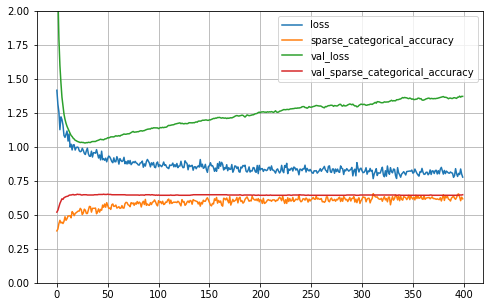

16/16 [==============================] - 0s 2ms/step - loss: 1.3717 - sparse_categorical_accuracy: 0.6480


[1.3717375993728638, 0.6480000019073486]

In [55]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization

model3 = keras.models.Sequential([
    keras.layers.AlphaDropout(rate=0.2,input_shape = [X_test.shape[1]]),
    BatchNormalization( ),
    keras.layers.Dense(30, activation="elu",kernel_initializer=keras.initializers.he_normal(seed=13111985),use_bias=False),
    keras.layers.AlphaDropout(rate=0.2),
    BatchNormalization(),
    keras.layers.Dense(20, activation="elu",kernel_initializer=keras.initializers.he_normal(seed=13111985),use_bias=False),
    keras.layers.AlphaDropout(rate=0.2),
    BatchNormalization(),
    keras.layers.Dense(12, activation="elu",kernel_initializer=keras.initializers.he_normal(seed=13111985),use_bias=False),
    keras.layers.AlphaDropout(rate=0.2),
    BatchNormalization(),
    keras.layers.Dense(3, activation="softmax")
])

model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["sparse_categorical_accuracy"])

history = model3.fit(X_train, y_train, epochs=400,
                    validation_data=(X_valid, y_valid),verbose = 0, batch_size = 50)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_graph")
plt.show()
model3.evaluate(X_valid,y_valid)

## Task 5b: Test all the models so far on the test set
**Once again note: this is in general bad practice if we were going to then select and use one of these models.** Why? As we are procedurally overfitting (selecting based on knowledge from the test set). However, for now it serves to show to you while you learn that the model is actually doing better on completely unseen instances.

In [56]:
m1 = model.evaluate(X_test,y_test)
m2 = model2.evaluate(X_test,y_test)
m3 = model3.evaluate(X_test,y_test)

16/16 [==============================] - 0s 3ms/step - loss: 1.1182 - sparse_categorical_accuracy: 0.6640


## Task 6: Add early stopping
**HINT 1:** Think about what you are monitoring (if you want the validation version prepend the name with 'val_')

**HINT 2:** Set the min_delta by considering the performance of past models.

**HINT 3:** In the specific version of tensorflow we're using (2.0) the import is:
`from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping`
This has changed in tensorflow 2.1

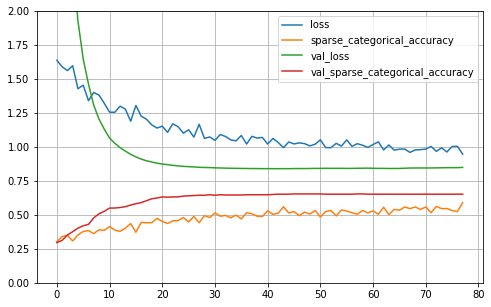

16/16 [==============================] - 0s 2ms/step - loss: 0.8490 - sparse_categorical_accuracy: 0.6520


[0.8490180373191833, 0.6520000100135803]

In [57]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(
'best_model.h5', 
monitor='val_sparse_categorical_accuracy',
save_best_only = True
)

es = EarlyStopping(
     monitor='val_sparse_categorical_accuracy', 
     min_delta = 0.01, 
     patience=50)



model4 = keras.models.Sequential([
    keras.layers.AlphaDropout(rate=0.2,input_shape = [X_test.shape[1]]),
    BatchNormalization( ),
    keras.layers.Dense(30, activation="elu",kernel_initializer=keras.initializers.he_normal(seed=13111985),use_bias=False),
    keras.layers.AlphaDropout(rate=0.2),
    BatchNormalization(),
    keras.layers.Dense(20, activation="elu",kernel_initializer=keras.initializers.he_normal(seed=13111985),use_bias=False),
    keras.layers.AlphaDropout(rate=0.2),
    BatchNormalization(),
    keras.layers.Dense(12, activation="elu",kernel_initializer=keras.initializers.he_normal(seed=13111985),use_bias=False),
    keras.layers.AlphaDropout(rate=0.2),
    BatchNormalization(),
    keras.layers.Dense(3, activation="softmax")
])

model4.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["sparse_categorical_accuracy"])

history = model4.fit(X_train, y_train, epochs=400,
                    validation_data=(X_valid, y_valid),
                     verbose = 0, batch_size = 50,
                     callbacks=[es,mc])

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_graph")
plt.show()
model4.evaluate(X_valid,y_valid)

### Considering just the validation scores, did that help?


In [ ]:
# Yes, in terms of computation time. We traded off a little accuracy though.

## Task 6b: Test all the models so far on the test set
**Once again note: this is in general bad practice if we were going to then select and use one of these models.** Why? As we are procedurally overfitting (selecting based on knowledge from the test set). However, for now it serves to show to you while you learn that the model is actually doing better on completely unseen instances.

In [58]:
m1 = model.evaluate(X_test,y_test)
m2 = model2.evaluate(X_test,y_test)
m3 = model3.evaluate(X_test,y_test)
m4 = model4.evaluate(X_test,y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.8315 - sparse_categorical_accuracy: 0.6540


# Task 7: Change the optimizer
Slide example:
```
# Momentum optimizer
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

# AdaGrad
optimizer = keras.optimizers.Adagrad(lr=0.001)

# ADAM

optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Using the optimizer
model.compile(
loss="sparse_categorical_crossentropy",
     optimizer=optimizer,
     metrics=["accuracy"])

```

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


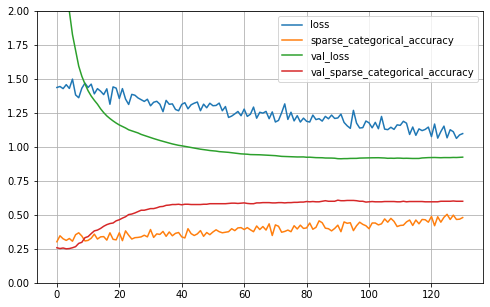

16/16 [==============================] - 0s 2ms/step - loss: 0.9245 - sparse_categorical_accuracy: 0.6000


[0.9244640469551086, 0.6000000238418579]

In [59]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(
'best_model.h5', 
monitor='val_sparse_categorical_accuracy',
save_best_only = True
)

es = EarlyStopping(
     monitor='val_sparse_categorical_accuracy', 
     min_delta = 0.01, 
     patience=50)



model5 = keras.models.Sequential([
    keras.layers.AlphaDropout(rate=0.2,input_shape = [X_test.shape[1]]),
    BatchNormalization( ),
    keras.layers.Dense(30, activation="elu",kernel_initializer=keras.initializers.he_normal(seed=13111985),use_bias=False),
    keras.layers.AlphaDropout(rate=0.2),
    BatchNormalization(),
    keras.layers.Dense(20, activation="elu",kernel_initializer=keras.initializers.he_normal(seed=13111985),use_bias=False),
    keras.layers.AlphaDropout(rate=0.2),
    BatchNormalization(),
    keras.layers.Dense(12, activation="elu",kernel_initializer=keras.initializers.he_normal(seed=13111985),use_bias=False),
    keras.layers.AlphaDropout(rate=0.2),
    BatchNormalization(),
    keras.layers.Dense(3, activation="softmax")
])

model5.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.00005, beta_1=0.1, beta_2=0.1),
              metrics=["sparse_categorical_accuracy"])

history = model5.fit(X_train, y_train, epochs=400,
                    validation_data=(X_valid, y_valid),
                     verbose = 0, batch_size = 50,
                     callbacks=[es,mc])

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_graph")
plt.show()
model5.evaluate(X_valid,y_valid)

## Considering just the validation scores, what did you learn?

In [ ]:
# In this case changing the optimization stratergy isn't helping much
# In fact the sgd optimiser was doing well and the added flexibility here
# means it often gets stuck in worse minima. 

## Task 7b: Test all the models so far on the test set
**Once again note: this is in general bad practice if we were going to then select and use one of these models.** Why? As we are procedurally overfitting (selecting based on knowledge from the test set). However, for now it serves to show to you while you learn that the model is actually doing better on completely unseen instances.

In [60]:
m1 = model.evaluate(X_test,y_test)
m2 = model2.evaluate(X_test,y_test)
m3 = model3.evaluate(X_test,y_test)
m4 = model4.evaluate(X_test,y_test)
m5 = model5.evaluate(X_test,y_test)

16/16 [==============================] - 0s 3ms/step - loss: 0.9272 - sparse_categorical_accuracy: 0.6020


# Task 8 (Bonus): Implement a self-normalizing net
HINT: Slide example
```
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")
```

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


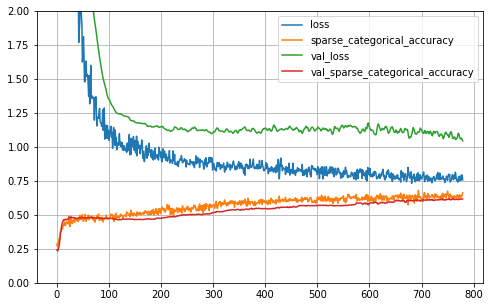

16/16 [==============================] - 0s 2ms/step - loss: 1.0442 - sparse_categorical_accuracy: 0.6180


[1.0442311763763428, 0.6179999709129333]

In [61]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization

model6 = keras.models.Sequential([
    keras.layers.AlphaDropout(rate=0.1,input_shape = [X_test.shape[1]]),
    keras.layers.Dense(10, activation="selu",kernel_initializer="lecun_normal",use_bias=True),
    keras.layers.AlphaDropout(rate=0.1),
    keras.layers.Dense(8, activation="selu",kernel_initializer="lecun_normal",use_bias=True),
    keras.layers.AlphaDropout(rate=0.1),
    keras.layers.Dense(6, activation="selu",kernel_initializer="lecun_normal",use_bias=True),
    keras.layers.AlphaDropout(rate=0.1),
    keras.layers.Dense(3, activation="softmax")
])

model6.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.0007, beta_1=0.9, beta_2=0.999),
              metrics=["sparse_categorical_accuracy"])

history = model6.fit(X_train, y_train, epochs=780,
                    validation_data=(X_valid, y_valid),verbose = 0, batch_size = 100)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
#save_fig("keras_learning_curves_graph")
plt.show()
model6.evaluate(X_valid,y_valid)

## Task 8b: Test all the models so far on the test set
**Once again note: this is in general bad practice if we were going to then select and use one of these models.** Why? As we are procedurally overfitting (selecting based on knowledge from the test set). However, for now it serves to show to you while you learn that the model is actually doing better on completely unseen instances.

In [62]:
m1 = model.evaluate(X_test,y_test)
m2 = model2.evaluate(X_test,y_test)
m3 = model3.evaluate(X_test,y_test)
m4 = model4.evaluate(X_test,y_test)
m5 = model5.evaluate(X_test,y_test)
m6 = model6.evaluate(X_test,y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.9233 - sparse_categorical_accuracy: 0.6120
